In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing necessary modules

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

## Plot all images belonging to different classes

In [ ]:
path = r'/content/drive/MyDrive/ds data/datasets/Dataset1/DAWN/'
classes = os.listdir(path)
sample_images = list()
for i in classes:
  sample_images.append(os.listdir(os.path.join(path, i))[5])
sample_images_path = list()
for i, j in zip(classes, sample_images):
  sample_images_path.append(os.path.join(path, i , j))

['rain_storm-008.jpg', 'sand_storm-253.jpg', 'snow_storm-013.jpg', 'mist-138.jpg']


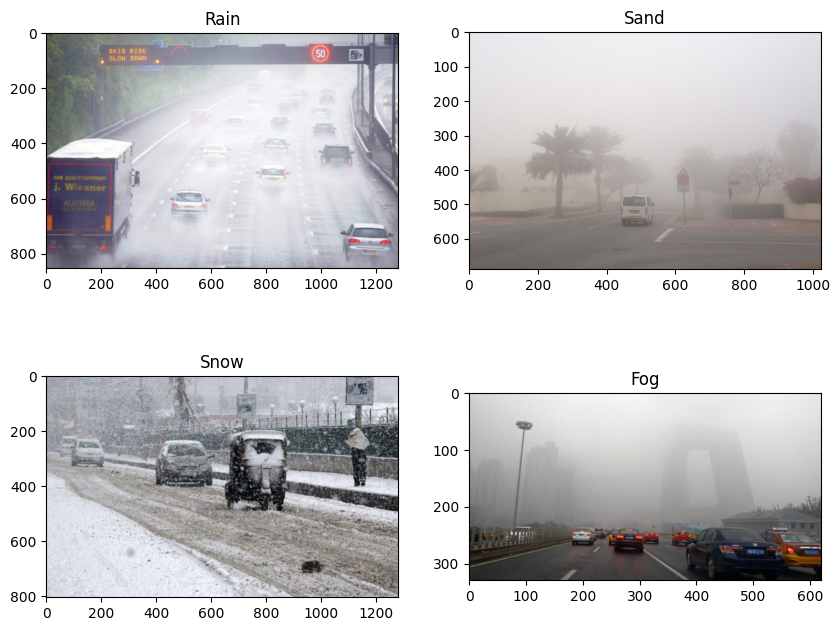

In [ ]:
# plot images from all classes
print(sample_images)
plt.figure(figsize=(10,8))
for i,(j,z) in enumerate(zip(sample_images_path, classes)):
  img = cv2.imread(j)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(2, 2, i+1)
  plt.imshow(img)
  plt.title(z)

plt.show()
# print(sample_images_path)

## Changing of color channels of a given particular image

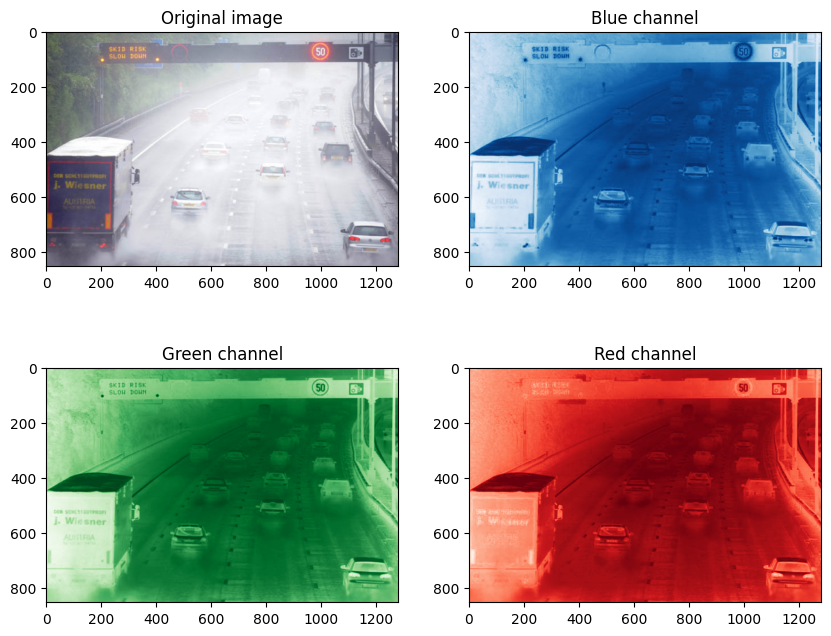

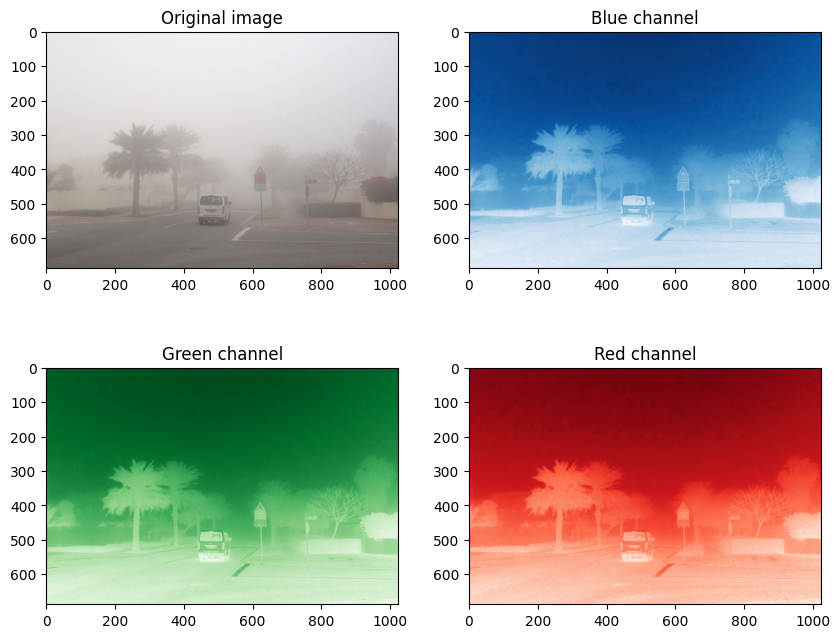

In [ ]:
rain = sample_images_path[0]
rain = cv2.imread(rain)
rain = cv2.cvtColor(rain, cv2.COLOR_BGR2RGB)

plt.figure(0, figsize=(10, 8))
plt.subplot(2,2,1)
plt.title('Original image')
plt.imshow(rain)

plt.subplot(222)
plt.title('Blue channel')
plt.imshow(rain[:,:,0], cmap='Blues')

plt.subplot(223)
plt.title('Green channel')
plt.imshow(rain[:,:,1], cmap='Greens')

plt.subplot(224)
plt.title('Red channel')
plt.imshow(rain[:,:,2], cmap='Reds')
plt.show()

sand = sample_images_path[1]
sand = cv2.imread(sand)
sand = cv2.cvtColor(sand, cv2.COLOR_BGR2RGB)

plt.figure(0, figsize=(10, 8))
plt.subplot(2,2,1)
plt.title('Original image')
plt.imshow(sand)

plt.subplot(222)
plt.title('Blue channel')
plt.imshow(sand[:,:,0], cmap='Blues')

plt.subplot(223)
plt.title('Green channel')
plt.imshow(sand[:,:,1], cmap='Greens')

plt.subplot(224)
plt.title('Red channel')
plt.imshow(sand[:,:,2], cmap='Reds')
plt.show()

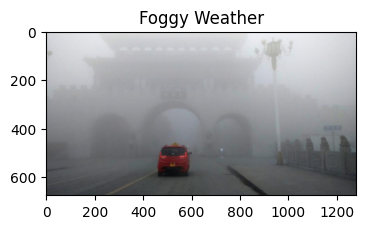

In [ ]:
path = r'/content/drive/MyDrive/ds data/datasets/Dataset1/DAWN/Fog/foggy-001.jpg'

# plot the image
plt.figure(figsize=(4,4))
img = plt.imread(path)
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Foggy Weather')
plt.show()

In [ ]:
print(img.shape)
newimg = np.transpose(img, (2, 0, 1))
print(newimg.shape)

(675, 1280, 3)
(3, 675, 1280)


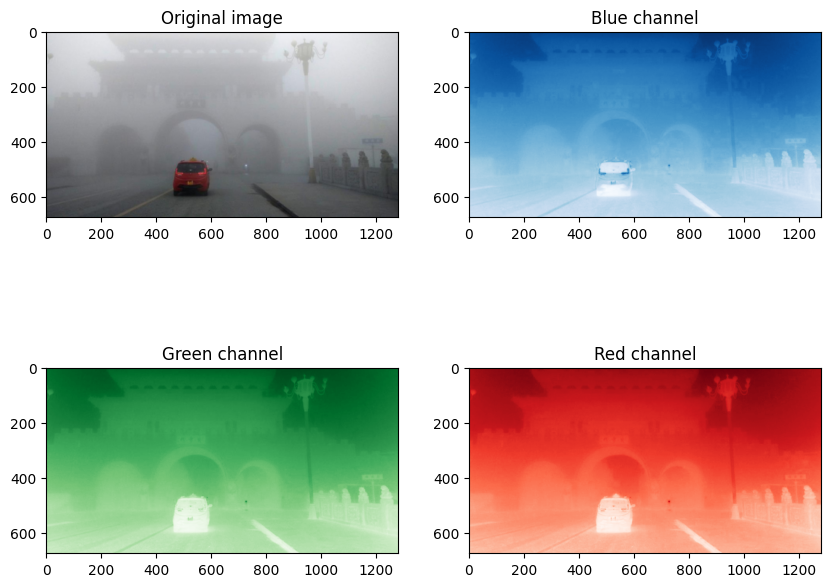

In [ ]:
# plot shows all color levels (BGR) order
plt.figure(0, figsize=(10, 8))
plt.subplot(2,2,1)
plt.title('Original image')
plt.imshow(img)

plt.subplot(222)
plt.title('Blue channel')
plt.imshow(img[:,:,0], cmap='Blues')

plt.subplot(223)
plt.title('Green channel')
plt.imshow(img[:,:,1], cmap='Greens')

plt.subplot(224)
plt.title('Red channel')
plt.imshow(img[:,:,2], cmap='Reds')

In [ ]:
# # another method
blue_channel, green_channel, red_channel = cv2.split(img)
# plt.subplot(2,2,1)
# plt.imshow(blue, cmap="Blues")
# plt.subplot(2,2,2)
# plt.imshow(green, cmap="Greens")
# plt.subplot(2,2,3)
# plt.imshow(red, cmap="Reds")

## Contour and Pixel intensity

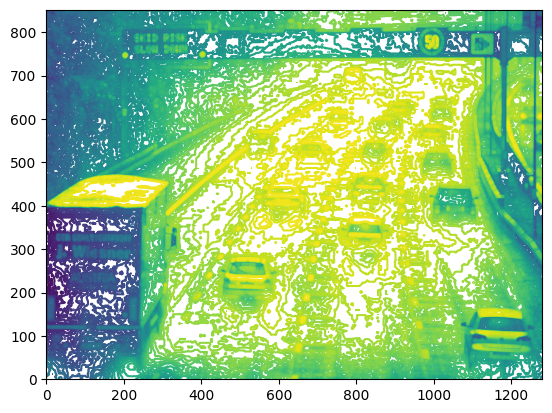

In [ ]:
# plot contour of the image
rain2 = rain.copy()
rain2 = cv2.flip(rain2, 0)
imlab = cv2.cvtColor(rain2, cv2.COLOR_BGR2LAB)
plt.figure(1,)
Y = range(imlab.shape[0])
X = range(imlab.shape[1])
X, Y = np.meshgrid(X, Y)
plt.contour(X, Y, imlab[:,:,0], 50)

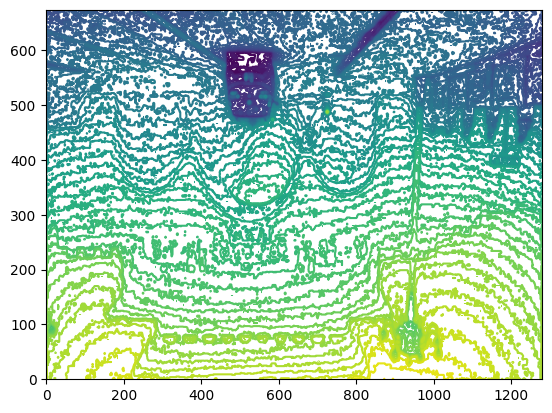

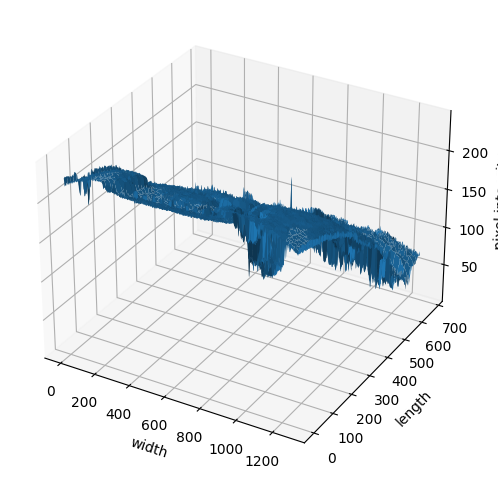

In [ ]:
# plot contour of the image
imlab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.figure(1,)
Y = range(imlab.shape[0])
X = range(imlab.shape[1])
X, Y = np.meshgrid(X, Y)
plt.contour(X, Y, imlab[:,:,0], 50)

# plot the pixel intensity of image
plt.figure(2, figsize=(6,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('width')
ax.set_ylabel('length')
ax.set_zlabel('pixel intensity')
ax.plot_surface(X, Y, imlab[:,:,0])
plt.show()

## Histogram for pixel intensity and HeatMap of pixel intensity

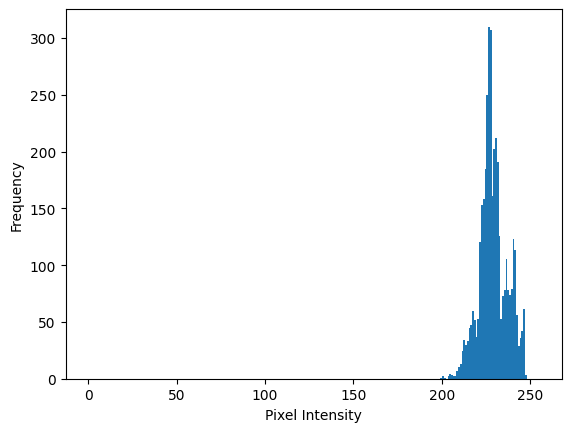

In [ ]:
# np.ravel for flaten the array
plt.hist(img[0].ravel(), bins=256, range=(0,255))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

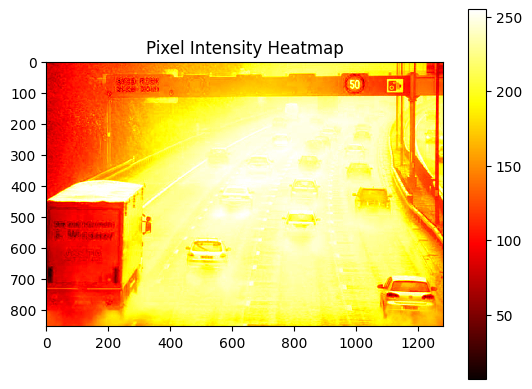

In [ ]:
# heatmap of pixel intensity
plt.imshow(rain[:, :, 2], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Pixel Intensity Heatmap')
plt.show()

## Finding Correlation coefficient

In [ ]:
# flatten in column order while ravel in row order for default
# np.corrcoef return covariance
corr_blue_green = np.corrcoef(blue_channel.flatten(), green_channel.flatten())[0, 1]
corr_green_red = np.corrcoef(green_channel.flatten(), red_channel.flatten())[0, 1]
corr_red_blue = np.corrcoef(red_channel.flatten(), blue_channel.flatten())[0, 1]

print(f"Correlation between Blue and Green channels: {corr_blue_green}")
print(f"Correlation between Green and Red channels: {corr_green_red}")
print(f"Correlation between Blue and Red channels: {corr_red_blue}")

Correlation between Blue and Green channels: 0.9934971800315668
Correlation between Green and Red channels: 0.9991788292718958
Correlation between Blue and Red channels: 0.9926433897244795


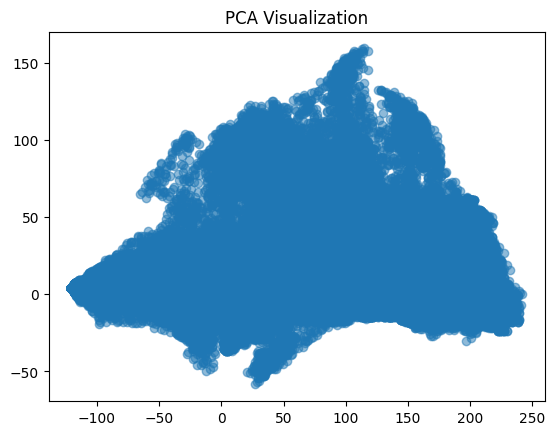

In [ ]:
from sklearn.decomposition import PCA

flattened_image = rain.reshape((-1, 3))

pca = PCA(n_components=2)
principal_components = pca.fit_transform(flattened_image)
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.show()

## Resizing and Rotation of images

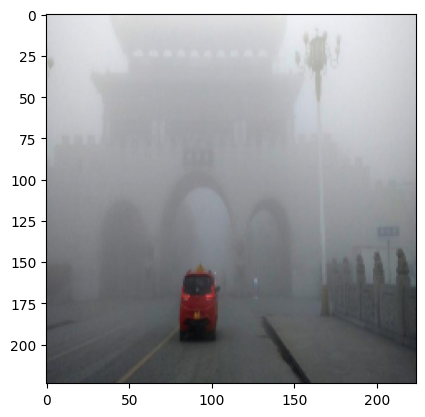

In [ ]:
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
plt.imshow(img)
plt.show()

In [ ]:
angle = 45
h = img.shape[0]
w = img.shape[1]
center = ( w//2, h//2 )
rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)

rot_img = cv2.warpAffine(img, rot_mat, (w, h))

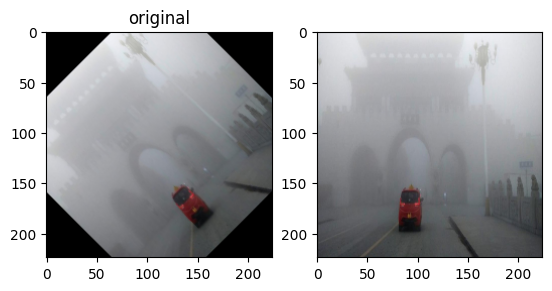

In [ ]:
plt.subplot(1,2,1)
plt.title("rotated")
plt.imshow(rot_img)
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()